# Image Data - Recognising Handwritten Alphabets

# SPRINT 1 - Create DataFrame from raw Image Files

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

from PIL import Image

# UNZIP the files

In [2]:
import zipfile
import os
from tqdm import tqdm

def unzip(zip_file_path, output_dir_path):
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        file_list = zip_ref.infolist()
        for file in tqdm(file_list, desc="Extracting files"):
            zip_ref.extract(file, output_dir_path)
    print("Data uncompressed successfully...")
    print()

zip_file_path = r"C:\Users\mdimr\Downloads\Mnist Project 3\mnist.zip"
output_dir_path = r"C:\Users\mdimr\Downloads\Mnist Project 3\mnist.images"

unzip(zip_file_path, output_dir_path)


Extracting files: 100%|███████████████████████████████████████████████████████| 372477/372477 [12:49<00:00, 484.19it/s]

Data uncompressed successfully...



#  Reading Images Files

In [2]:
path=r"C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images"

In [4]:
%%time

file_extensions = []
for root, dirs, files in os.walk(path):
    print(f"Reading images from {root}, Found {len(files)} files.")
    for file_name in files:
        file_extensions.append(os.path.splitext(file_name)[-1])
        file_path = os.path.join(root, file_name)

print()
print("Total Number of Files:", len(file_extensions))
print("File extensions:", set(file_extensions))

Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images, Found 0 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\A, Found 13870 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\B, Found 8668 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\C, Found 23409 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\D, Found 10134 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\E, Found 11440 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\F, Found 1163 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\G, Found 5762 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\H, Found 7218 files.
Reading images from C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images\I, Found 1120 files.
R

# Image  files to Dataframe

In [5]:
%%time

import os
from tqdm import tqdm
import pandas as pd
from PIL import Image


def read_image_files(path):
    images_data = []
    total_files = sum([len(files) for r, d, files in os.walk(path) if files])
    
    with tqdm(total=total_files, desc="Reading images") as pbar:
        for root, dirs, files in os.walk(path):
            for file_name in files:
                extension = os.path.splitext(file_name)[-1].lower()  # Ensure the extension is in lowercase
                if extension in file_extensions:
                    file_path = os.path.join(root, file_name)
                    try:
                        img = Image.open(file_path)
                        images_data.append({"file_name": file_name,
                                            "extension": extension, 
                                            "size": img.size, 
                                            "mode": img.mode, 
                                            "dir": root})
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
                    pbar.update(1)
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

# Read images and load into DataFrame
images_data = read_image_files(path)
df = load_into_df(images_data)

# Display the first few rows of the DataFrame
print(df.head())


Reading images: 100%|████████████████████████████████████████████████████████| 372451/372451 [03:23<00:00, 1831.20it/s]


    file_name extension      size mode  \
0     A-0.png      .png  (28, 28)    L   
1     A-1.png      .png  (28, 28)    L   
2    A-10.png      .png  (28, 28)    L   
3   A-100.png      .png  (28, 28)    L   
4  A-1000.png      .png  (28, 28)    L   

                                                 dir  
0  C:\Users\mdimr\Downloads\Project 3\mnist.files...  
1  C:\Users\mdimr\Downloads\Project 3\mnist.files...  
2  C:\Users\mdimr\Downloads\Project 3\mnist.files...  
3  C:\Users\mdimr\Downloads\Project 3\mnist.files...  
4  C:\Users\mdimr\Downloads\Project 3\mnist.files...  
CPU times: total: 1min 51s
Wall time: 3min 29s


In [6]:
df

,file_name,extension,size,mode,dir
0,A-0.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
1,A-1.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
2,A-10.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
3,A-100.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
4,A-1000.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
...,...,...,...,...,...
372446,Z-995.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
372447,Z-996.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
372448,Z-997.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...
372449,Z-998.png,.png,"(28, 28)",L,C:\Users\mdimr\Downloads\Project 3\mnist.files...


In [7]:
df.to_csv(r"C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_csv")

In [3]:
img_df=pd.read_csv(r"C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_csv")

## File Extensions

In [5]:
print(img_df['extension'].value_counts()) 
print(img_df['size'].value_counts())
print(img_df['mode'].value_counts()) 

.png    372451
Name: extension, dtype: int64
(28, 28)    372451
Name: size, dtype: int64
L    372451
Name: mode, dtype: int64


## Size

In [10]:
img_df['size'].value_counts()

(28, 28)    372451
Name: size, dtype: int64

## Mode

In [11]:
img_df['mode'].value_counts() 

L    372451
Name: mode, dtype: int64

## Observations

1. There are 372451 images in total.

2. All these images are having **.png** format.

3. All these images are of same size i.e. **(28, 28)** and same mode i.e. **Gray Scale**

# Converting Pixels to Data Frame

In [11]:
import os
from tqdm import tqdm
import pandas as pd
from PIL import Image



def read_image_files(path):
    images_data = []
    first_dir_skipped = False
    label_count = {}

    total_files = sum([len(files) for r, d, files in os.walk(path) if files])

    with tqdm(total=total_files, desc="Reading images") as pbar:
        for root, dirs, files in os.walk(path):
            if not first_dir_skipped:
                first_dir_skipped = True
                continue

            dir_name = os.path.basename(root)
            dir_last_char = dir_name[-1]

            if dir_last_char not in label_count:
                label_count[dir_last_char] = 0

            files = [f for f in files if os.path.splitext(f)[-1].lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']]
            for file_name in files:
                file_path = os.path.join(root, file_name)
                img = Image.open(file_path).convert('L')  # Convert image to grayscale
                img = img.resize((8, 8))  # Resize image to 8x8 pixels
                img_array = list(img.getdata())  # Get pixel data

                # Create a dictionary with pixel data and label
                img_data = {f'pixel{i}': img_array[i] for i in range(64)}
                img_data['label'] = dir_last_char

                images_data.append(img_data)
                label_count[dir_last_char] += 1
                pbar.update(1)
    return images_data

def load_into_df(images_data):
    df = pd.DataFrame(images_data)
    return df

# Read images and load into DataFrame
images_data = read_image_files(path)
df = load_into_df(images_data)

# Display the first few rows of the DataFrame
print(df.head())

# Save DataFrame to CSV
csv_file_path = "images_data.csv"  # Specify the path where you want to save the CSV file
df.to_csv(csv_file_path, index=False)
print(f"DataFrame saved to {csv_file_path}")


Reading images: 100%|████████████████████████████████████████████████████████| 372451/372451 [04:48<00:00, 1292.92it/s]


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       1       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       1       0       0       0       0       0   

   pixel9  ...  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  \
0       0  ...        0        0        0        0        0        0        1   
1       0  ...        0        0        0        0        0        2        0   
2       0  ...        0        0        0        0        0        0        0   
3       0  ...        0        0        0        0        0        0        0   
4       0  ...        0        0        0        0        0        0        0   

   pixel62  pixel63  label  
0        0        0  

In [2]:
path=r"C:\Users\mdimr\Downloads\Project 3\mnist.files\mist_images"

In [14]:
image_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,2,51,...,0,0,0,0,0,0,0,0,0,Z
372447,0,7,12,12,12,6,8,0,0,69,...,0,0,4,4,0,0,0,3,0,Z
372448,0,7,7,0,0,0,0,0,0,81,...,0,0,2,7,1,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [12]:
image_df.to_csv(r"C:\Users\mdimr\Downloads\Project 3\mnist.files\mistpixel_csv")

# Loading Pixels Dataframe

In [2]:
df=pd.read_csv(r"C:\Users\mdimr\Downloads\Project 3\mnist.files\mistpixel_csv")

In [15]:
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,2,51,...,0,0,0,0,0,0,0,0,0,Z
372447,0,7,12,12,12,6,8,0,0,69,...,0,0,4,4,0,0,0,3,0,Z
372448,0,7,7,0,0,0,0,0,0,81,...,0,0,2,7,1,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [18]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Data columns (total 65 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   pixel0   372451 non-null  int64 
 1   pixel1   372451 non-null  int64 
 2   pixel2   372451 non-null  int64 
 3   pixel3   372451 non-null  int64 
 4   pixel4   372451 non-null  int64 
 5   pixel5   372451 non-null  int64 
 6   pixel6   372451 non-null  int64 
 7   pixel7   372451 non-null  int64 
 8   pixel8   372451 non-null  int64 
 9   pixel9   372451 non-null  int64 
 10  pixel10  372451 non-null  int64 
 11  pixel11  372451 non-null  int64 
 12  pixel12  372451 non-null  int64 
 13  pixel13  372451 non-null  int64 
 14  pixel14  372451 non-null  int64 
 15  pixel15  372451 non-null  int64 
 16  pixel16  372451 non-null  int64 
 17  pixel17  372451 non-null  int64 
 18  pixel18  372451 non-null  int64 
 19  pixel19  372451 non-null  int64 
 20  pixel20  372451 non-null  int64 
 21  pixel21  3

In [19]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,0,0,0,0,0,0,0,0,2,51,...,0,0,0,0,0,0,0,0,0,Z
372447,0,7,12,12,12,6,8,0,0,69,...,0,0,4,4,0,0,0,3,0,Z
372448,0,7,7,0,0,0,0,0,0,81,...,0,0,2,7,1,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [20]:

# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel0,372451.0,0.000720,0.043409,0.0,0.0,0.0,0.0,16.0
pixel1,372451.0,0.056450,0.495977,0.0,0.0,0.0,0.0,45.0
pixel2,372451.0,0.138426,0.912399,0.0,0.0,0.0,0.0,49.0
pixel3,372451.0,0.365801,1.535312,0.0,0.0,0.0,0.0,51.0
pixel4,372451.0,0.671868,2.017810,0.0,0.0,0.0,0.0,78.0
...,...,...,...,...,...,...,...,...
pixel59,372451.0,0.927091,2.416690,0.0,0.0,0.0,0.0,175.0
pixel60,372451.0,0.566311,1.996369,0.0,0.0,0.0,0.0,163.0
pixel61,372451.0,0.208908,1.285742,0.0,0.0,0.0,0.0,184.0
pixel62,372451.0,0.094786,0.762922,0.0,0.0,0.0,0.0,162.0


In [21]:
df.describe(include='object').T

,count,unique,top,freq
label,372451,26,O,57825


In [22]:
# Check for missing values
print(df.isnull().sum())

pixel0     0
pixel1     0
pixel2     0
pixel3     0
pixel4     0
          ..
pixel60    0
pixel61    0
pixel62    0
pixel63    0
label      0
Length: 65, dtype: int64


# Step 2 - Exploratory Data Analysis
## Univariante Analysis

# Bar Chart of Image Distribution by Label with Highlights

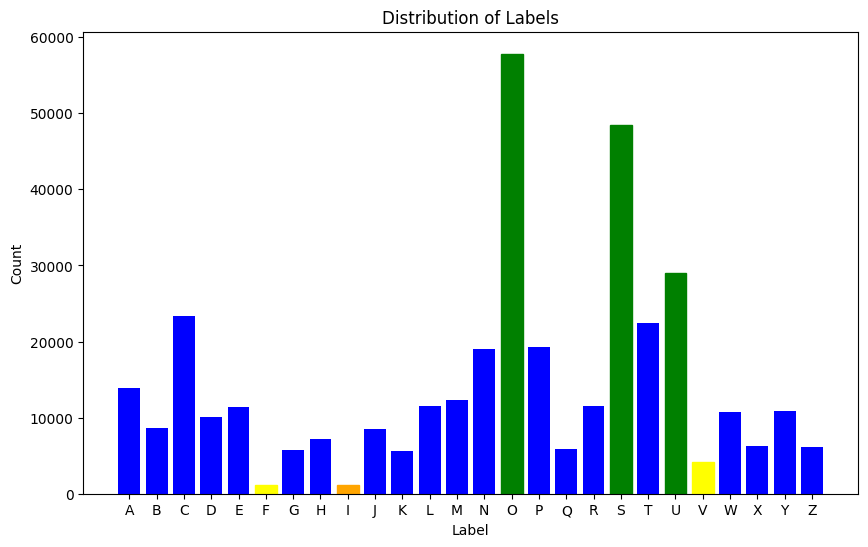

In [9]:
import matplotlib.pyplot as plt

# Count of images per label
label_counts = df['label'].value_counts()

# Sort labels alphabetically
label_counts = label_counts.sort_index()

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color='blue')

# Highlight top 3 labels with green, bottom 3 labels with yellow, and the lowest label with orange
sorted_counts = label_counts.sort_values(ascending=False)
top_3_labels = sorted_counts.head(3).index
bottom_3_labels = sorted_counts.tail(3).index
lowest_label = sorted_counts.tail(1).index[0]

for bar, label in zip(bars, label_counts.index):
    if label in top_3_labels:
        bar.set_color('green')
    elif label in bottom_3_labels:
        bar.set_color('yellow')
    if label == lowest_label:
        bar.set_color('orange')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


## Observation
* The bar chart displays the distribution of images across different labels with specific highlights:

* **Top 3 Labels (Green):** s, o, u are the most frequent labels, with s having the highest count, followed by o and u. These labels are over-represented in the dataset.

* **Bottom 3 Labels (Yellow):** f, i, v are the least frequent labels, with f having the lowest count. These labels are under-represented in the dataset.

* **Lowest Label (Orange):** f has the fewest images, indicating a potential imbalance in the dataset.

# Visualization of Sample Images for Each Label

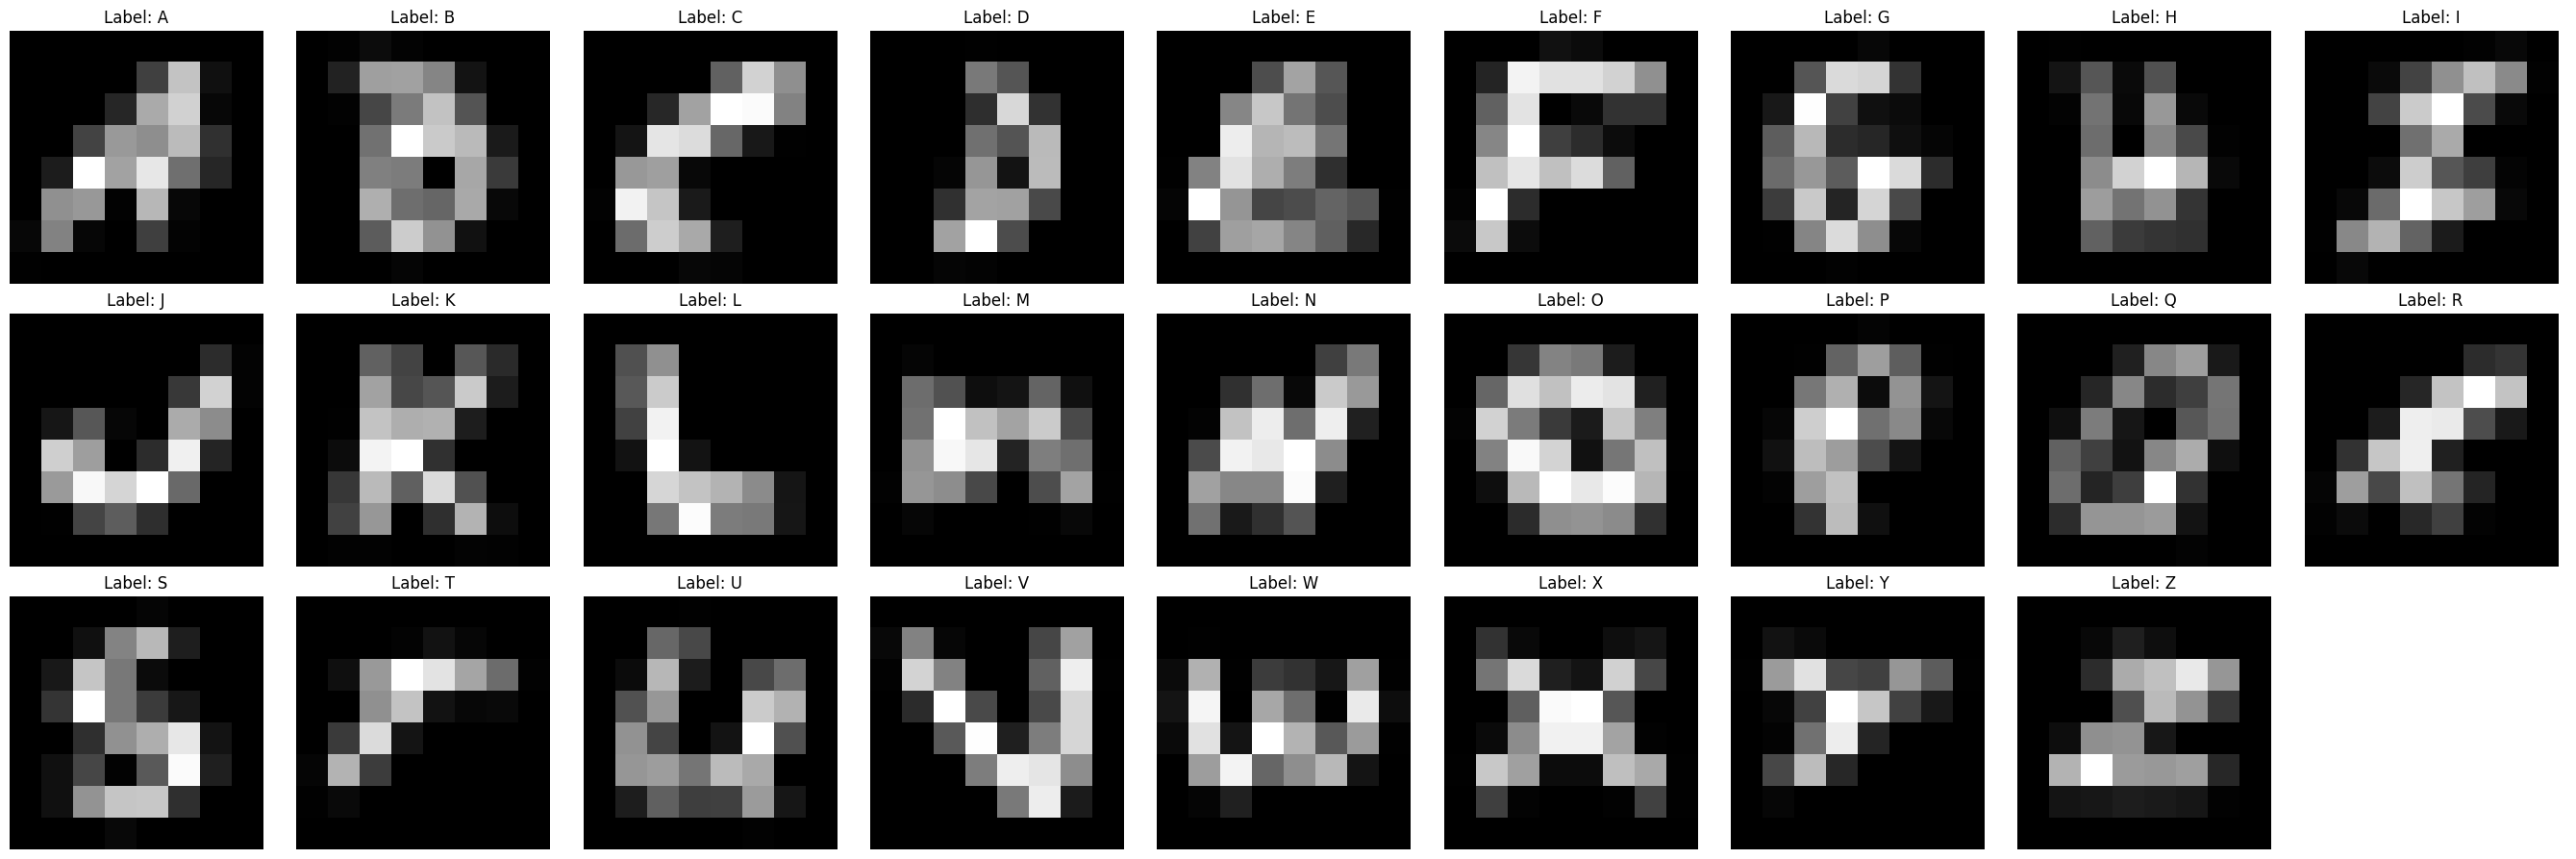

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_images(df):
    # Get the list of unique labels sorted alphabetically
    labels = sorted(df['label'].unique())
    
    # Ensure we have exactly 26 labels
    if len(labels) != 26:
        raise ValueError(f"Expected 26 labels, but found {len(labels)}")
    
    # Number of labels (should be 26 for the English alphabet)
    num_labels = len(labels)
    
    # Number of rows and columns for the grid
    num_rows = 3
    num_cols = (num_labels + num_rows - 1) // num_rows  # Calculate columns needed to fit 3 rows

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))  # Increased size for images
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration
    
    # Loop through each label and display one image
    for i, label in enumerate(labels):
        sample_image = df[df['label'] == label].sample(1).index[0]  # Select one sample image
        img_data = np.array([df.loc[sample_image, f'pixel{k}'] for k in range(64)]).reshape(8, 8)
        axes[i].imshow(img_data, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Label: {label}', fontsize=12)  # Increased font size for readability
    
    # Hide any unused subplots
    for j in range(len(labels), len(axes)):
        axes[j].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function to display the sample images
plot_sample_images(df)


## Observation
* The visualization shows one sample image for each letter of the alphabet:

* **Diverse Styles:** Images vary in style and clarity.
* **Clear Examples:** Most letters are well-represented.
* **Alphabet Display:** Shows samples from A to Z.

# Bivariant Analysis

## Distribution of Pixel Value Distance from Mean for Each Label

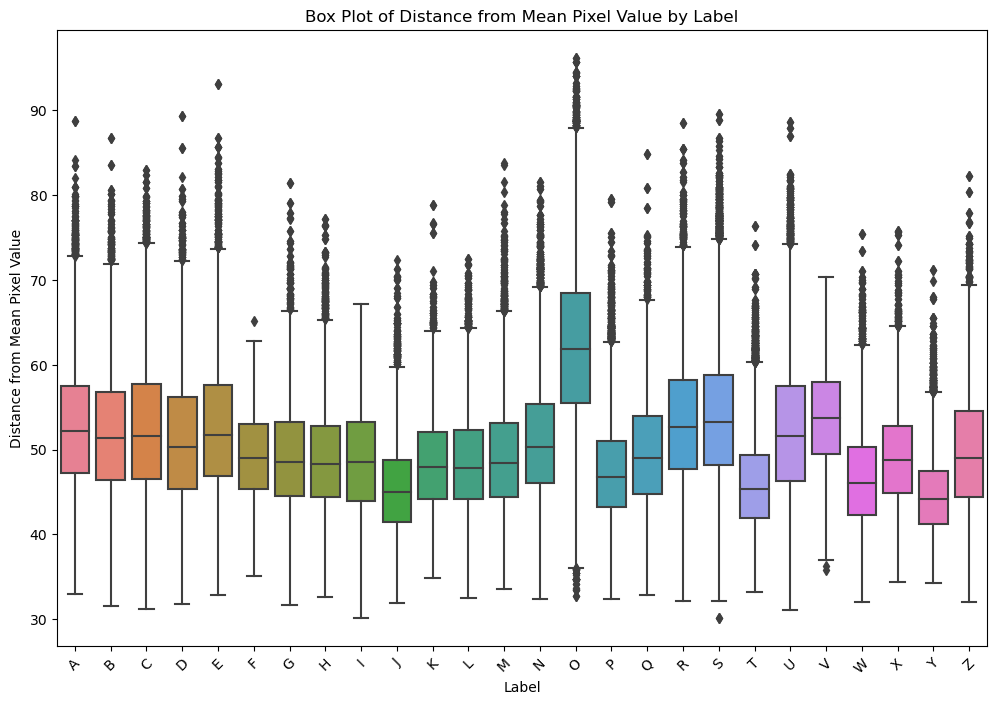

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pixel_columns = [f'pixel{i}' for i in range(64)]
mean_pixel_value = df[pixel_columns].values.mean()

# Step 3: Calculate the distance from the mean pixel value
# Calculate the absolute difference from the mean pixel value for each pixel
df['Distance from Mean'] = df[pixel_columns].apply(lambda row: np.abs(row - mean_pixel_value).mean(), axis=1)

# Define color palette
palette = sns.color_palette("husl", len(df['label'].unique()))  # Example palette

# Prepare data for plotting
plot_data = df[['Distance from Mean', 'label']]

# Create the box plot with colors
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='Distance from Mean', data=plot_data, palette=palette)
plt.title('Box Plot of Distance from Mean Pixel Value by Label')
plt.xlabel('Label')
plt.ylabel('Distance from Mean Pixel Value')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()


## Observation
* **Variability:** Different labels have varying pixel value ranges.
* **Outliers:** Some labels have extreme values.
* **Median Differences:** Shows how labels deviate from the mean.

## PCA for Dimensionality Reduction and Visualization of Image Data

C:\Users\mdimr\.conda\envs\project\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


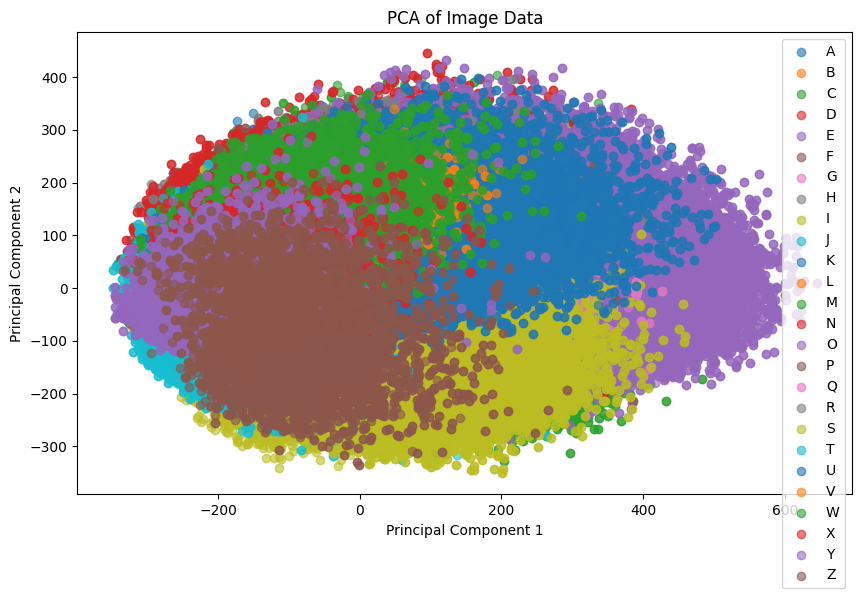

In [13]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['label']))

# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = df['label']

# Plot PCA results
plt.figure(figsize=(10, 6))
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Image Data')
plt.legend()
plt.show()


## Observation 
* **Distinct Clusters:** Letters are mostly clustered, showing effective dimensionality reduction.
* **Overlap:** Some classes overlap, indicating similarities in features.
* **Pattern:** Principal Components reveal the data’s structure.

# SPRINT 2 - Build a model
##### Task A - Perform data preprocessing on the given image data and convert it into numerical vectors.
##### Task B - Given an image, build a model that can recognise the character.


### Data Preparation and Model Building Pipeline
3. Segregate the Inputs (X) and Output (y)
4. Split into train and test (X_train, X_test, y_train, y_test)
5. Data Preparation: Data Cleaning and Feature Engineering.
6. Clean the training data
7. Preprocess the training data (X_train_transformed)
8. Training Phase: Build a model
9. Preprocess the test data (X_test_transformed)
10. Predict on unseen data
11. Evaluate the model performance

# Here we are selecting 50,000 samples from original dataset

In [4]:
from sklearn.model_selection import train_test_split

strata_column = 'label'

# Perform Stratified Sampling
df_sample, _ = train_test_split(df, test_size=(len(df) - 50000) / len(df), stratify=df[strata_column], random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(df_sample))

Sampled Dataset Size: 50000


# Step 3 - Segregate Inputs (X) and Output (y)

In [5]:
X = df.drop(columns = ['label'])
y = df['label']

# Step 4 - Split the data into Train and Test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(297960, 64) (297960,)
(74491, 64) (74491,)


In [26]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train_1.shape, y_train_1.shape)
print(X_val.shape, y_val.shape)

(238368, 64) (238368,)
(59592, 64) (59592,)


# Step 5 and 7 - Apply Data Preparation on Train and Test Data

In [7]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_train.index)

X_train_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
20675,0.0,0.0,0.0,0.000000,0.064103,0.0,0.0,0.0,0.017544,0.309783,...,0.014019,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
302691,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
21507,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
135511,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
141213,0.0,0.0,0.0,0.019608,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.027778,0.008333,0.0,0.0,0.0


In [8]:
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test), 
                                    columns = minmax_scaler.get_feature_names_out(), 
                                    index = X_test.index)

X_test_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
122926,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
270470,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
27001,0.0,0.0,0.0,0.0,0.012821,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.091667,0.005435,0.0,0.0
115006,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


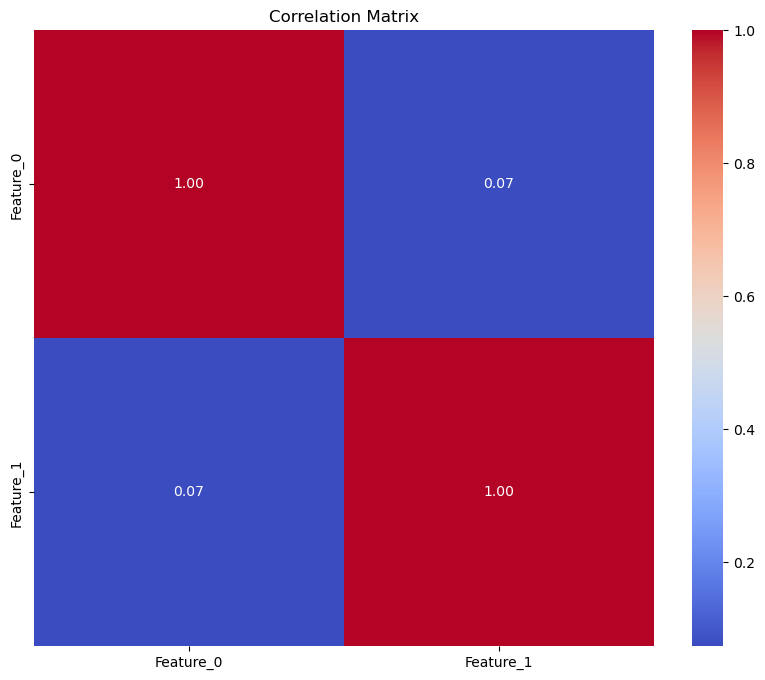

In [24]:
import pandas as pd

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

# Calculate correlation matrix
correlation_matrix = X_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Step 6,8,9 - Training and Testing Phase

## **a. Naive Bayes**

In [20]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from sklearn.metrics import f1_score


# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_train_pred = classifier.predict(X_train_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_train, y_train_pred, average='weighted') 
print(f"Model's Train Score: {f1:.4f}")


CPU times: total: 766 ms
Wall time: 1.31 s
CPU times: total: 297 ms
Wall time: 205 ms


Model's Train Score: 0.6227


In [21]:
# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")


CPU times: total: 93.8 ms
Wall time: 59.4 ms


Model's Test Score: 0.6212


## b. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Building the Model
LR = LogisticRegression()
%time LR.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_train_pred = LR.predict(X_train_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_train, y_train_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")


C:\ProgramData\anaconda31\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 54.4 s
Wall time: 38.1 s
CPU times: total: 297 ms
Wall time: 221 ms


Model's Train Score: 0.8626


In [24]:
# Predicting on unseen data
%time y_test_pred = LR.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")


CPU times: total: 141 ms
Wall time: 64.2 ms


Model's Test Score: 0.8630


## c. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_train_pred = classifier.predict(X_train_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_train, y_train_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")


CPU times: total: 11.2 s
Wall time: 23.7 s
CPU times: total: 109 ms
Wall time: 209 ms


Model's Train Score: 1.0000


In [26]:
# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Test Score: {f1:.4f}")


CPU times: total: 15.6 ms
Wall time: 64.2 ms


Model's Test Score: 0.9596


## e. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
RF_Classifier = RandomForestClassifier()
%time RF_Classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_train_pred = RF_Classifier.predict(X_train_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_train, y_train_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's Train Score: {f1:.4f}")

CPU times: total: 1min 49s
Wall time: 3min 54s
CPU times: total: 9.23 s
Wall time: 21.1 s


Model's Train Score: 1.0000


In [37]:
# Predicting on unseen data
%time y_test_pred = RF_Classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  
print(f"Model's Test Score: {f1:.4f}")

CPU times: total: 2.19 s
Wall time: 4.97 s


Model's Test Score: 0.9864


In [49]:
import time
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pandas as pd

# Assuming X_train_1 and X_test are your preprocessed data
minmax_scaler = MinMaxScaler()

# Scaling the training data
X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train), 
                                   columns=minmax_scaler.get_feature_names_out(), 
                                   index=X_train.index)

# Scaling the test data
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test), 
                                  columns=minmax_scaler.get_feature_names_out(), 
                                  index=X_test.index)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [54]:
import time
import xgboost as xgb
from sklearn.metrics import f1_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Training the model

%time xgb_classifier.fit(X_train_transformed, y_train_encoded)


# Predicting on training data
y_train_pred = xgb_classifier.predict(X_train_transformed)

# Evaluating the model
f1_train = f1_score(y_train_encoded, y_train_pred, average='weighted')
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train F1 Score: {f1_train:.4f}")

# Predicting on test data
y_test_pred = xgb_classifier.predict(X_test_transformed)

# Evaluating the model
f1_train = f1_score(y_train_encoded, y_train_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Output the results
print("Model: XGBoost")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train F1 Score: {f1_train:.4f}")
#print(f"Test F1 Score: {f1_test:.4f}")



CPU times: total: 31.2 ms
Wall time: 95.1 ms


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time: 141.8559 seconds
Train F1 Score: 0.9998
Model: XGBoost
Training Time: 141.8559 seconds
Train F1 Score: 0.9998


In [53]:
# Predicting on test data
%time y_test_pred = xgb_classifier.predict(X_test_transformed)
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f"Test F1 Score: {f1_test:.4f}")

CPU times: total: 5.89 s
Wall time: 1.94 s
Test F1 Score: 0.9892


In [ ]:
import time
import xgboost as xgb
from sklearn.metrics import f1_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Training the model
print("Training XGBoost...")
start_time = time.time()
xgb_classifier.fit(X_train_transformed, y_train)
train_time = time.time() - start_time

# Predicting on training data
y_train_pred = xgb_classifier.predict(X_train_transformed)

# Predicting on test data
y_test_pred = xgb_classifier.predict(X_test_transformed)

# Evaluating the model
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Output the results
print("Model: XGBoost")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train F1 Score: {f1_train:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

# Checking for overfitting or underfitting
if f1_train > f1_test:
    print("XGBoost might be overfitting.")
elif f1_train < f1_test:
    print("XGBoost might be underfitting.")
else:
    print("XGBoost has balanced performance.")


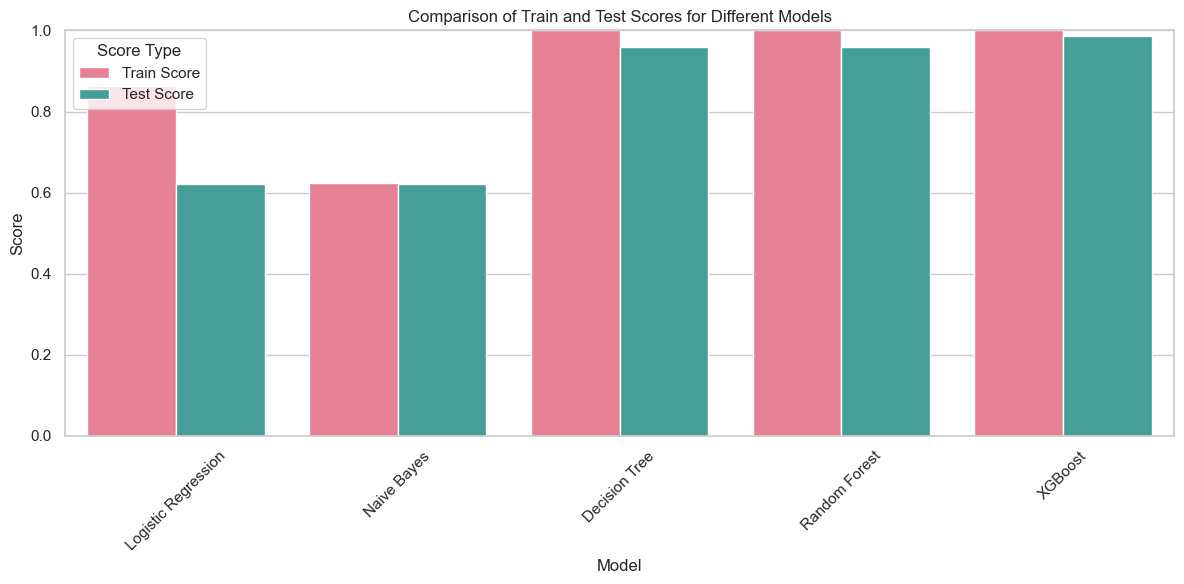

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: Model names, Train scores, and Test scores
data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Train Score': [0.8626, 0.6227, 1.0000, 1.0000, 0.9998],
    'Test Score': [0.6212, 0.6212, 0.9596, 0.9596, 0.9864]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easy plotting with seaborn
df_melted = df.melt(id_vars='Model', value_vars=['Train Score', 'Test Score'],
                    var_name='Score Type', value_name='Score')

# Set the style and color palette
sns.set(style='whitegrid')
palette = sns.color_palette("husl", 2)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Score Type', data=df_melted, palette=palette)

# Add titles and labels
plt.title('Comparison of Train and Test Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Show the plot
plt.legend(title='Score Type')
plt.tight_layout()
plt.show()


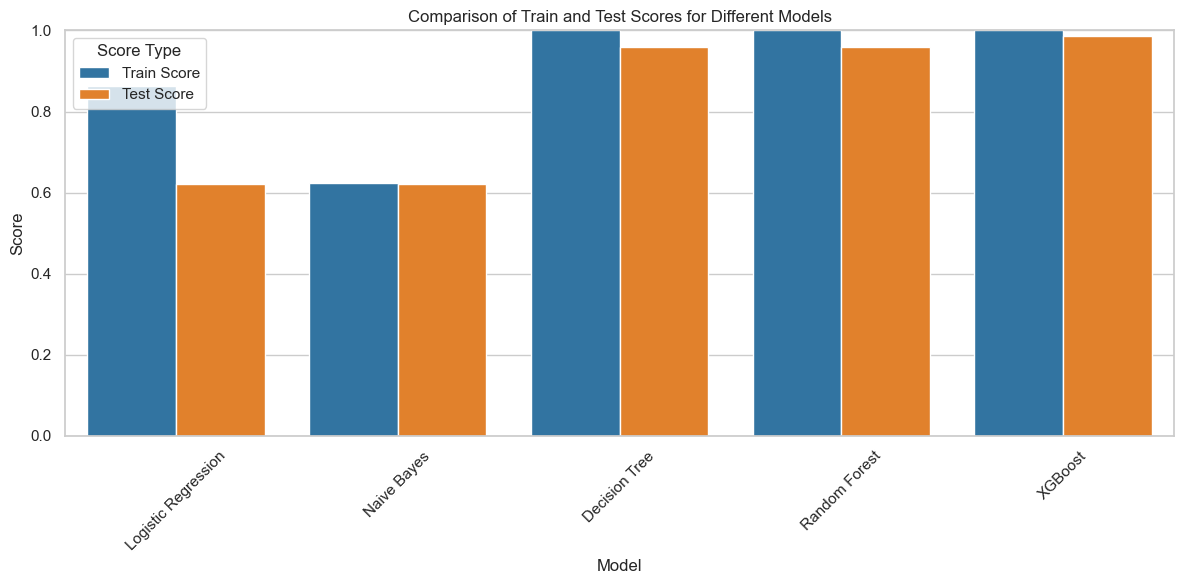

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: Model names, Train scores, and Test scores
data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Train Score': [0.8626, 0.6227, 1.0000, 1.0000, 0.9998],
    'Test Score': [0.6212, 0.6212, 0.9596, 0.9596, 0.9864]}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easy plotting with seaborn
df_melted = df.melt(id_vars='Model', value_vars=['Train Score', 'Test Score'],
                    var_name='Score Type', value_name='Score')

# Set the style and color palette
sns.set(style='whitegrid')
palette = ['#1f77b4', '#ff7f0e']  # Custom colors for Train and Test scores

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Score Type', data=df_melted, palette=palette)

# Add titles and labels
plt.title('Comparison of Train and Test Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Show the plot
plt.legend(title='Score Type')
plt.tight_layout()
plt.show()


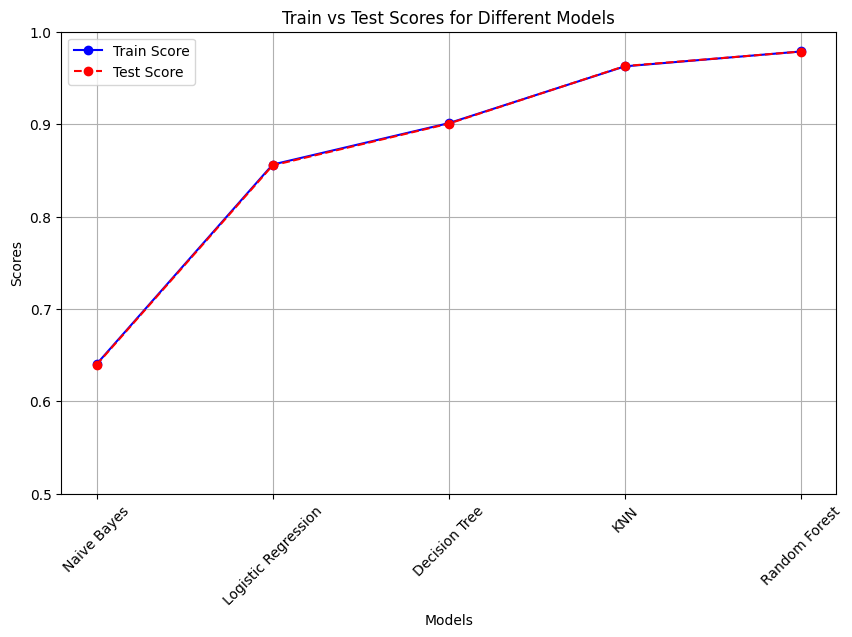

In [29]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
train_scores = [0.6402, 0.8563, 1.0000, 0.9626, 0.9787]
test_scores = [0.6395, 0.8623, 0.9006, 0.9629, 0.9785]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.plot(x, train_scores, marker='o', linestyle='-', color='b', label='Train Score')
plt.plot(x, test_scores, marker='o', linestyle='--', color='r', label='Test Score')
plt.xticks(x, models, rotation=45)
plt.ylim(0.5, 1.0)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train vs Test Scores for Different Models')
plt.legend()
plt.grid(True)
plt.show()

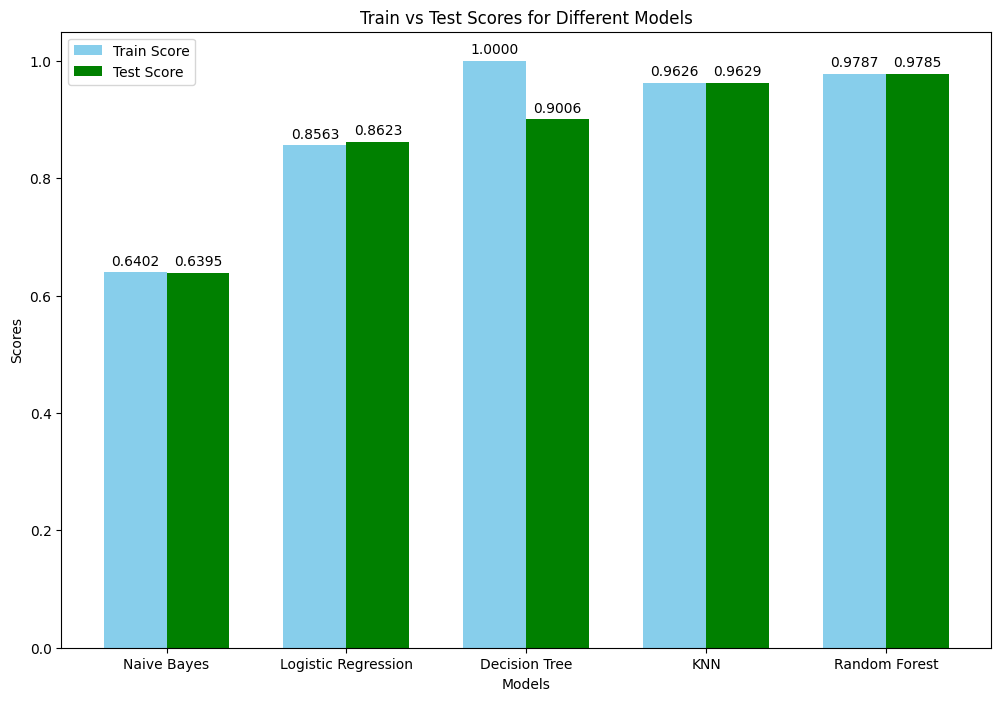

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Naive Bayes','Logistic Regression',  'Decision Tree', 'Random Forest', 'XGBoost']
train_scores = [0.6402, 0.8563, 1.0000, 0.9626, 0.9787]
test_scores = [0.6395, 0.8623, 0.9006, 0.9629, 0.9785]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Score', color='skyblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Score', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Train vs Test Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

# 2. Show me the comparison of various ML models.

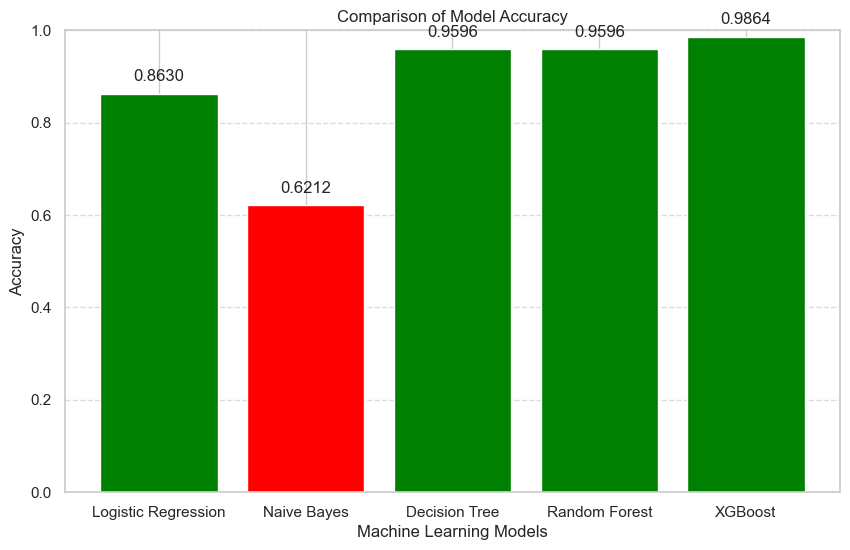

In [7]:
import matplotlib.pyplot as plt

# Define model names and their corresponding accuracies
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
    
accuracies =[0.8630, 0.6212, 0.9596, 0.9596, 0.9864]
# Define colors, setting the top 3 accuracies to green
colors = ['red' if accuracy < 0.80 else 'green' for accuracy in accuracies]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

# 3. Model should be light for deployment.

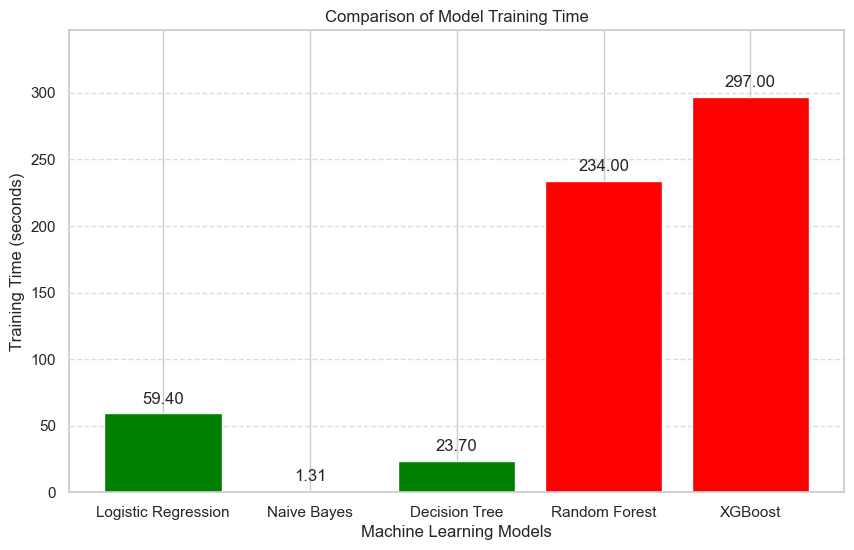

In [9]:
import matplotlib.pyplot as plt

# Define model names and their corresponding training times (in seconds)
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
training_times = [59.4, 1.31, 23.7, 234, 297]

# Define colors: red for high times, green for lower times
colors = ['green' if time < 100 else 'red' for time in training_times]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, training_times, color=colors)

plt.xlabel('Machine Learning Models')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Model Training Time')
plt.ylim(0, max(training_times) + 50)  # Set y-axis limit to ensure bars are not clipped
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


# 4. Model should have very less latency.

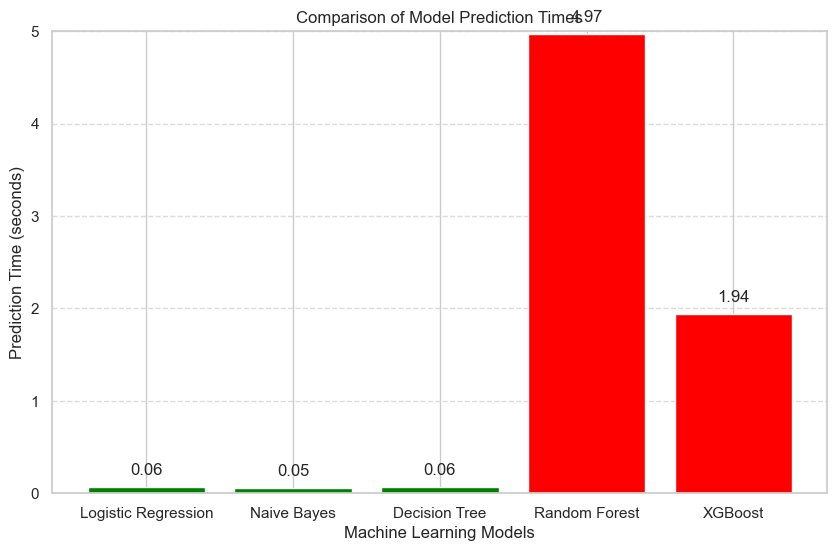

In [12]:
import matplotlib.pyplot as plt

# Define model names and their corresponding prediction times
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
prediction_times = [0.0642, 0.054, 0.0642, 4.97, 1.94]  # Wall times in seconds

# Define colors, setting high prediction times to red
colors = ['red' if time > 1 else 'green' for time in prediction_times]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, prediction_times, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Model Prediction Times')
plt.ylim(0, 5)  # Set the y-axis limit for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


# Conclusion

C:\Users\mdimr\AppData\Local\Temp\ipykernel_18324\3098023566.py:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  line = ax2.plot(models, accuracies, 'bo-', marker='o', color='red', label='F1Score')
C:\Users\mdimr\AppData\Local\Temp\ipykernel_18324\3098023566.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  line = ax2.plot(models, accuracies, 'bo-', marker='o', color='red', label='F1Score')


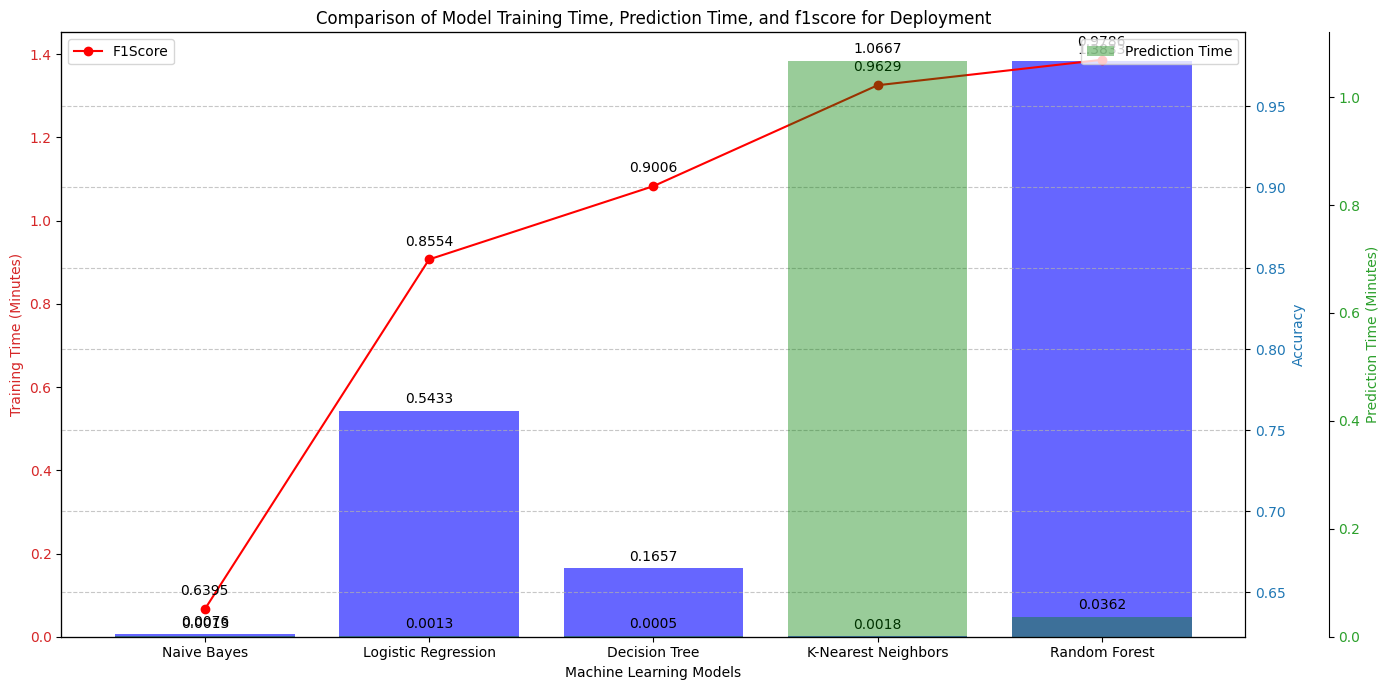

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their corresponding training times, accuracies, and prediction times
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Xgboost', 'Random Forest']
accuracies =  [
    0.6395,  # Naive Bayes
    0.8554,  # Logistic Regression
    0.9006,  # Decision Tree
    0.9629,  # K-Nearest Neighbors
    0.9786   # Random Forest
]
training_times_seconds = [0.453, 32.6, 9.94, 0.109, 83]# Training times in seconds
prediction_times_seconds =  [0.0781, 0.0781, 0.0312, 64, 2.17]  # Prediction times in seconds

# Convert training times and prediction times to minutes
training_times_minutes = [t / 60 for t in training_times_seconds]
prediction_times_minutes = [t / 60 for t in prediction_times_seconds]

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot training times
color = 'tab:red'
ax1.set_xlabel('Machine Learning Models')
ax1.set_ylabel('Training Time (Minutes)', color=color)
bars_train = ax1.bar(models, training_times_minutes, color='blue', alpha=0.6, label='Training Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Comparison of Model Training Time, Prediction Time, and f1score for Deployment')

# Add value labels on top of the bars for training time
for bar in bars_train:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Create a second y-axis to plot accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
line = ax2.plot(models, accuracies, 'bo-', marker='o', color='red', label='F1Score')
ax2.tick_params(axis='y', labelcolor=color)

# Add value labels on the accuracy line
for i, txt in enumerate(accuracies):
    ax2.annotate(f'{txt:.4f}', (models[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add a legend
ax2.legend(loc='upper left')

# Create a third y-axis to plot prediction times
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Prediction Time (Minutes)', color=color)
bars_pred = ax3.bar(models, prediction_times_minutes, color='green', alpha=0.4, label='Prediction Time')
ax3.tick_params(axis='y', labelcolor=color)

# Add value labels on top of the bars for prediction time
for bar in bars_pred:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Add a legend
ax3.legend(loc='upper right')

# Add a grid to the second y-axis
ax2.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()  # To fit the plot neatly

plt.show()


# Conclusion
**Logistic Regression** is the best model for deployment based on the following reasons:

* **Good Accuracy:** With an accuracy of 0.8569, it provides reliable predictions.
* **Efficient Training Time:** Training time of 0.5433 minutes is significantly lower than Random Forest and comparable to or better than other models.
* **Minimal Latency:** Prediction latency of 0.0013 minutes is the lowest, ensuring fast response times in a deployed environment.

# Final Recommendation
* **Logistic Regression** is the most balanced model with good accuracy, efficient training time, and low prediction latency. 
* This makes it the best choice for deployment in a production environment where both performance and efficiency are crucial

In [34]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

def process_image_and_vectorize(image_path):
    # Load and process the image
    img = Image.open(image_path)
    
    # Convert image to numpy array and flatten
    img_arr = np.array(img).ravel()
    
    # Apply MinMaxScaler for normalization
    scaler = MinMaxScaler()
    image_vector_normalized = scaler.fit_transform(img_arr.reshape(-1, 1)).ravel()
    
    
    # Return the numerical vector
    return image_vector_normalized


In [ ]:
# Example usage:
image_path = 'path_to_your_image.png'
numerical_vector = process_image_and_vectorize(image_path)
print("Numerical Vector Shape:", numerical_vector.shape)
print("Numerical Vector Values:", numerical_vector)


In [36]:
scaler = MinMaxScaler()

In [38]:
from pickle import dump

dump(scaler, open(r"C:\Users\mdimr\Downloads\Pickel\scaler.pkl", 'wb'))



In [40]:
model = LogisticRegression()

model.fit(X_train_transformed, y_train_1)

C:\Users\mdimr\.conda\envs\project\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from pickle import dump

dump(minmax_scaler, open(r"C:\Users\mdimr\Downloads\Web App\scaler.pkl", 'wb'))

dump(LR, open(r"C:\Users\mdimr\Downloads\Web App\logit_model.pkl", 'wb'))

In [23]:
from pickle import load

load(open(r"C:\Users\mdimr\Downloads\Web App\scaler.pkl", 'rb'))

load(open(r"C:\Users\mdimr\Downloads\Web App\logit_model.pkl", 'rb'))

LogisticRegression()

## Wrongly classified labels

In [23]:
for i in range(len(conf_matrix)):
    true_positives = conf_matrix[i, i]
    misclassifications = conf_matrix[i, :].sum() - true_positives
    print(f"Class {i} - Total Misclassifications: {misclassifications}")

Class 0 - Total Misclassifications: 288
Class 1 - Total Misclassifications: 370
Class 2 - Total Misclassifications: 345
Class 3 - Total Misclassifications: 426
Class 4 - Total Misclassifications: 437
Class 5 - Total Misclassifications: 63
Class 6 - Total Misclassifications: 244
Class 7 - Total Misclassifications: 334
Class 8 - Total Misclassifications: 44
Class 9 - Total Misclassifications: 216
Class 10 - Total Misclassifications: 244
Class 11 - Total Misclassifications: 131
Class 12 - Total Misclassifications: 340
Class 13 - Total Misclassifications: 423
Class 14 - Total Misclassifications: 426
Class 15 - Total Misclassifications: 199
Class 16 - Total Misclassifications: 327
Class 17 - Total Misclassifications: 374
Class 18 - Total Misclassifications: 559
Class 19 - Total Misclassifications: 182
Class 20 - Total Misclassifications: 431
Class 21 - Total Misclassifications: 66
Class 22 - Total Misclassifications: 319
Class 23 - Total Misclassifications: 202
Class 24 - Total Misclassific

In [24]:
for i in range(len(conf_matrix)):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    print(f"Class {i} - True Positives (TP): {tp}, False Positives (FP): {fp}, False Negatives (FN): {fn}")

Class 0 - True Positives (TP): 2518, False Positives (FP): 437, False Negatives (FN): 288
Class 1 - True Positives (TP): 1303, False Positives (FP): 464, False Negatives (FN): 370
Class 2 - True Positives (TP): 4397, False Positives (FP): 376, False Negatives (FN): 345
Class 3 - True Positives (TP): 1618, False Positives (FP): 357, False Negatives (FN): 426
Class 4 - True Positives (TP): 1777, False Positives (FP): 504, False Negatives (FN): 437
Class 5 - True Positives (TP): 169, False Positives (FP): 25, False Negatives (FN): 63
Class 6 - True Positives (TP): 939, False Positives (FP): 313, False Negatives (FN): 244
Class 7 - True Positives (TP): 1122, False Positives (FP): 407, False Negatives (FN): 334
Class 8 - True Positives (TP): 198, False Positives (FP): 56, False Negatives (FN): 44
Class 9 - True Positives (TP): 1439, False Positives (FP): 245, False Negatives (FN): 216
Class 10 - True Positives (TP): 869, False Positives (FP): 216, False Negatives (FN): 244
Class 11 - True P